In [21]:
#import databases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

#call diabetes database
data = datasets.load_diabetes(scaled=False)
df = pd.DataFrame(data['data'])
df.columns = data['feature_names']
df['target'] = data['target']

In [22]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


most of our variables mean are close to their medians, except for their medians. It looks like age is integer-valued (whole value integer). Sex is categorical. 

# Single Variable EDA

We will define some helper functions to do the analysis for single variable EDA: 

In [23]:
def single_variable_EDA(df, column_name, analysis_type):
    sns.set(style="whitegrid")
    color_palette = sns.color_palette("colorblind")

    if analysis_type == "categorical":
        fig, ax = plt.subplots(1, 2, figsize=(15, 6))

        # Bar Plot
        sns.countplot(data=df, x=column_name, ax=ax[1], palette=color_palette)
        ax[1].set_title(f'Count of each category in {column_name}')
        ax[1].set_xlabel(column_name)
        ax[1].set_ylabel('Count')

        plt.tight_layout()
        plt.show()

    elif analysis_type == "numerical":
        fig, ax = plt.subplots(1, 3, figsize=(18, 6))

        sns.boxplot(data=df, x=column_name, ax=ax[0], color=color_palette[0])
        ax[0].set_title(f'Box plot of {column_name}')
        ax[0].set_xlabel(column_name)

        # Histogram
        sns.histplot(data=df, x=column_name, ax=ax[1], kde=True, color=color_palette[1])
        ax[1].set_title(f'Histogram of {column_name}')
        ax[1].set_xlabel(column_name)
        ax[1].set_ylabel('Frequency')

        sns.violinplot(data=df, x=column_name, ax=ax[2], color=color_palette[2])
        ax[2].set_title(f'Violin plot of {column_name}')
        ax[2].set_xlabel(column_name)

        plt.tight_layout()
        plt.show()

    else:
        print("ERROR: Unknown analysis type. Please choose from categorical/numerical.")

### Age

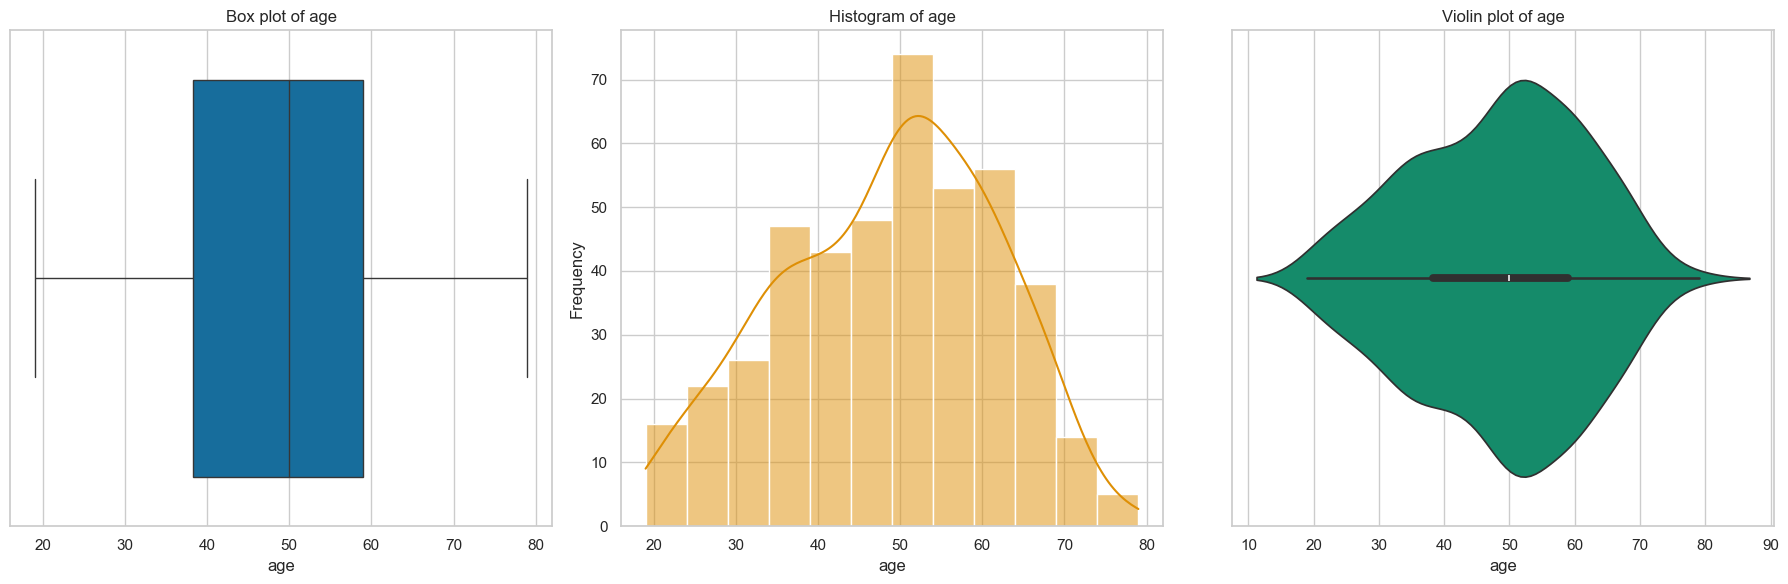

In [24]:
single_variable_EDA(df, "age", "numerical")

Most of our data has ages from about 40-60, or mid-aged individuals. Its centered around the mean of 48, almost normally distributed. 

### BMI 

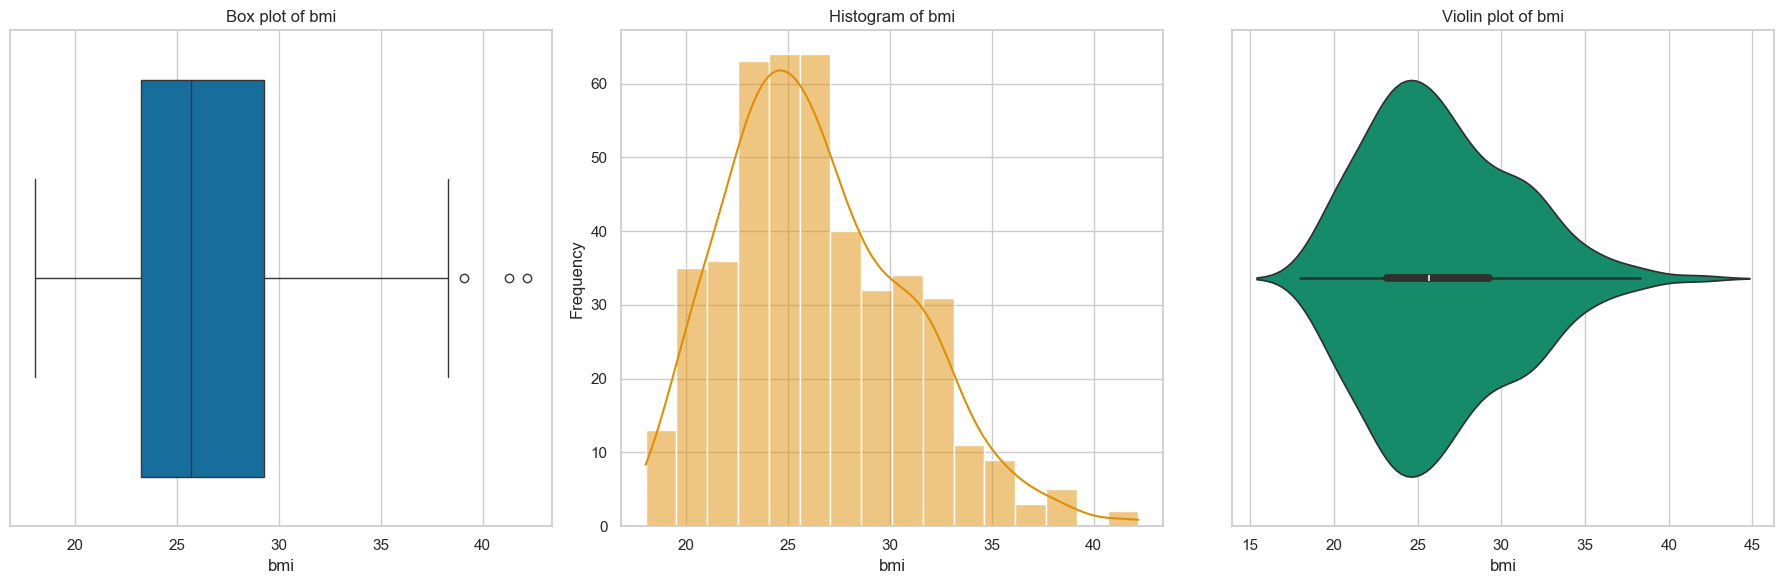

In [25]:
single_variable_EDA(df, "bmi", analysis_type = "numerical")

The distribution of BMI is skewed right. There may be a few outliers. The mean bmi is around 25 for this BMI. Most BMIs are around 18-29. Healthy BMIs are usually around 18 to 25. So, this dataset appears to have a mix of mostly healthy and slightly overweight individuals.

/var/folders/51/ybg7203j20s_k6yzlqkjm90h0000gn/T/ipykernel_14603/134525491.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, ax=ax[1], palette=color_palette)
/var/folders/51/ybg7203j20s_k6yzlqkjm90h0000gn/T/ipykernel_14603/134525491.py:9: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x=column_name, ax=ax[1], palette=color_palette)


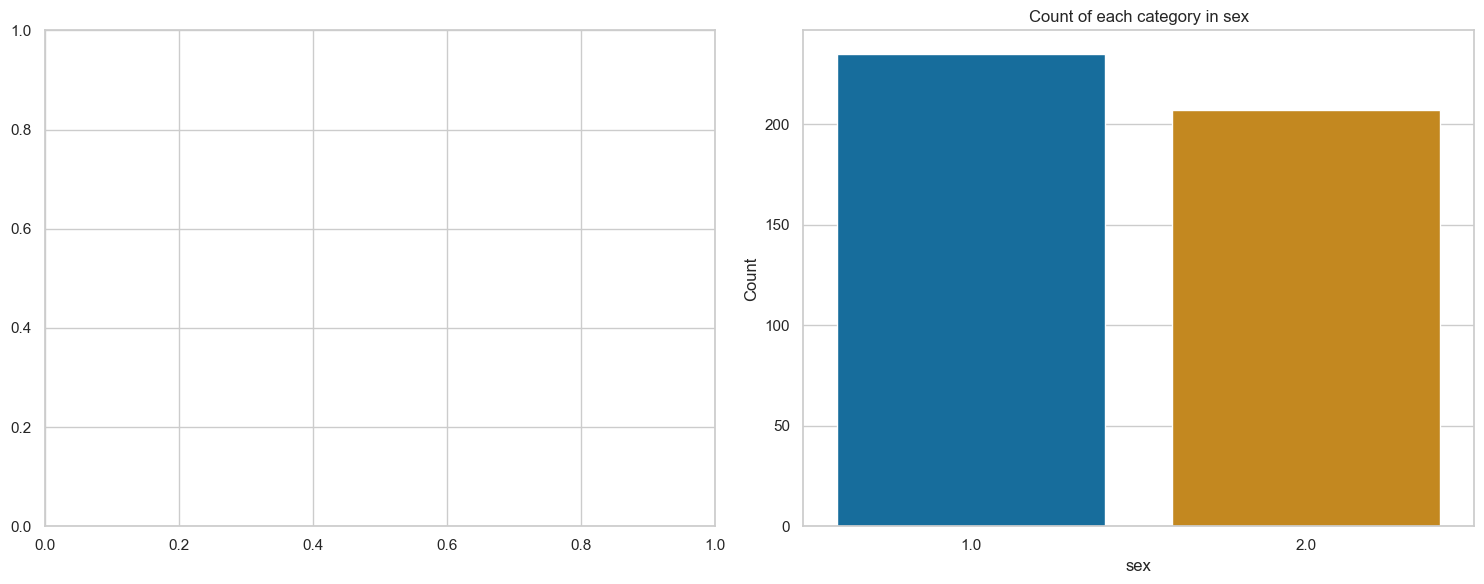

In [26]:
single_variable_EDA(df, "sex", "categorical")

There is a slight more sex "1.0" than "2.0". 

# Pairwise EDA

Bivariate analysis. Focus on features to target.

In [32]:
def pairwise_EDA(df, feature, target, analysis_type):
    if analysis_type == "numtonum":
        #scatter plot?
        sns.scatterplot(data=df, x=feature, y=target)
        plt.xlabel('category')
        plt.ylabel('value')
        plt.title(f"Scatter plot of {feature} to {target}")

    elif analysis_type == "catnum":
        #box plot?
        sns.boxplot(data=df, x=feature, y=target)
        plt.xlabel('category')
        plt.ylabel('Value')
        plt.title(f"Bar plot of {feature} to {target}")

    else: 
        print("ERROR: Unknown analysis type")

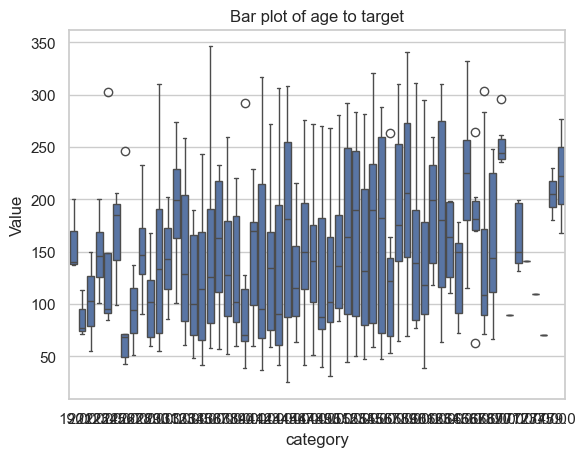

In [33]:
pairwise_EDA(df, "age", "target", "catnum")

In [37]:
df['bmi'].corr(df['target'], method = 'spearman')

0.5613820101065616